# Write tables Mutant vs WT

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import LinearSegmentedColormap
color_map = LinearSegmentedColormap.from_list('ss2_to_10x', ['red', 'lightgrey', 'blue'])

In [3]:
data = pd.read_csv('./results/all_parameters.txt',header=None)
features = pd.read_csv('./data_input/list_genes.csv',header=0,index_col=0)
time = pd.read_csv('./results/time_dpt_w_m.txt',header=None)

In [4]:
vec = data.columns
lt = list(time)

In [5]:
list_temp = []

In [6]:
for i in range(len(lt)):
    list_temp.append('alpha'+ str(lt[i]))
    
for i in range(len(lt)):
    list_temp.append('beta'+ str(lt[i]))
    
for i in range(len(lt)):
    list_temp.append('gamma'+ str(lt[i]))

In [7]:
data.index = data[0]
data.index = features['Gene']
data = data.T
data.index = list_temp

In [8]:
vec = np.array([0 for i in range(data.shape[0])],dtype = 'float')
vec2 = np.array([0 for i in range(data.shape[0])],dtype = 'float')

vec[:len(lt)] = list(time.loc[0])
vec[len(lt):len(lt)*2] = list(time.loc[0])
vec[len(lt)*2:len(lt)*3] = list(time.loc[0])

vec2[:len(lt)] = list(time.loc[1])
vec2[len(lt):len(lt)*2] = list(time.loc[1])
vec2[len(lt)*2:len(lt)*3] = list(time.loc[1])


data['dpt'] = vec
data['cell_index'] = vec2

data = data.T

data.to_csv('./results/table_genes.csv')

# Plot on umap

In [9]:
data = pd.read_csv('./results/table_genes.csv',index_col=0)

In [10]:
adata = sc.read('./data_input/adata_erythropoiesis.h5ad')

In [11]:
data_tr = data.iloc[:,:24154].copy()
data_tr = data_tr.T

data_de = data.iloc[:,24154*2:24154*3].copy()
data_de = data_de.T

In [12]:
adata = adata[adata.obs.sort_values(by='dpt_pseudotime').index].copy()

In [13]:
adata.obs['dif_tr_rate_ebf1'] = list(-data_tr['Ebf1'])
adata.obs['dif_de_rate_rap1gap2'] = list(-data_de['Rap1gap2'])

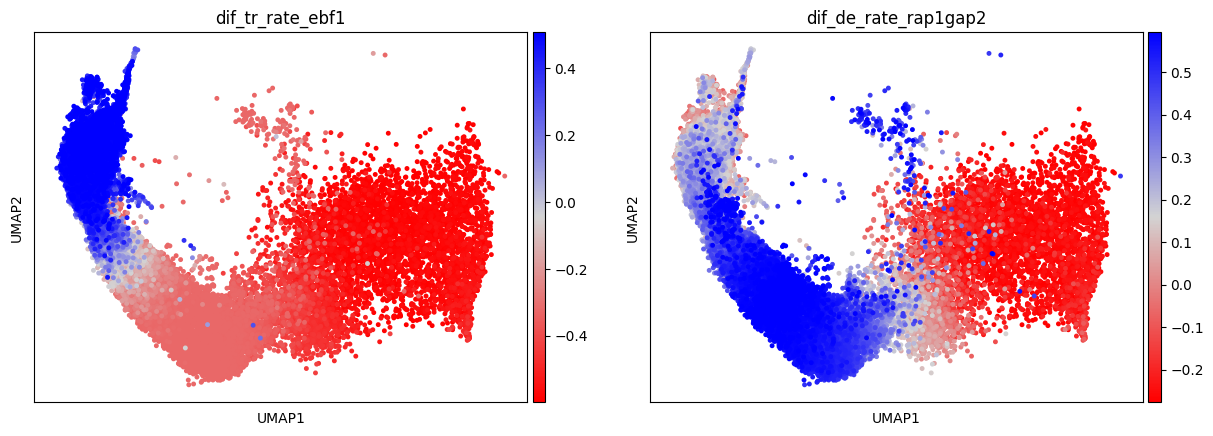

In [14]:
sc.pl.umap(adata,color = ['dif_tr_rate_ebf1','dif_de_rate_rap1gap2'],s = 50,color_map=color_map,save = '_rates_erythropoiesis.png')#

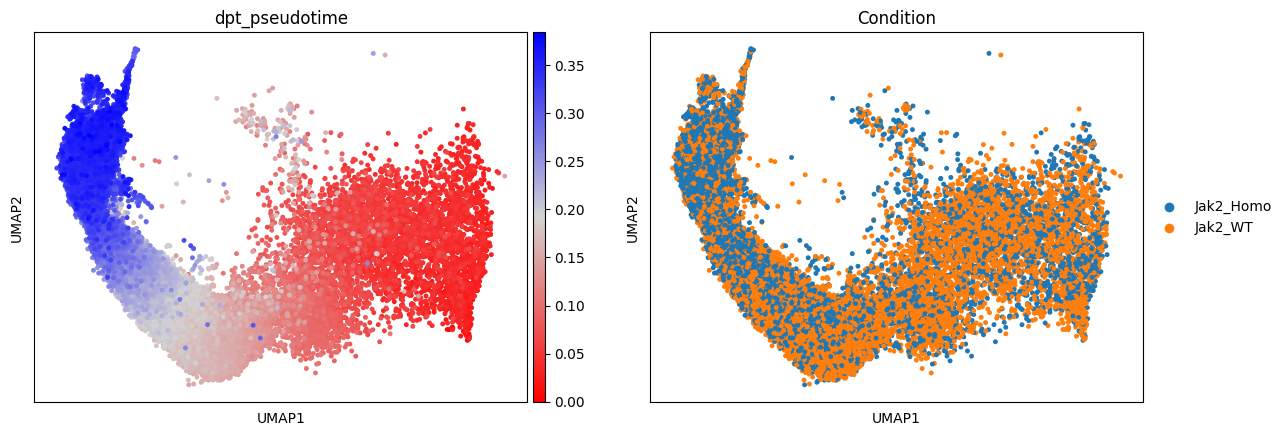

In [15]:
sc.pl.umap(adata,ncols=2,color = ['dpt_pseudotime','Condition'],s = 50,color_map=color_map,save = '_info_erythropoiesis.png')